### Exploring the moment tensor database. 

#### The eventual aim is the run a clustering algorithm on the earthquake information to see if it can reveal geological patterns

Also contains some experimental plotting with basemap

In [1]:
import pandas as pd
import obspy as op
import numpy as np
from MT_helper import read_quakes
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quakes = read_quakes('jan76_dec17.ndk')

In [3]:
quakes.head()

,Dep,Dip_1,Dip_2,Lat,Lon,Mag,Rake_1,Rake_2,Strike_1,Strike_2
0,59.0,93,88,-28.61,-177.64,6.2,30,60,202,18
1,95.0,-60,-105,-13.29,-74.90,6.0,28,66,350,137
2,33.0,78,94,51.60,159.33,5.7,18,73,206,39
3,168.0,-86,-91,-15.76,167.87,6.1,22,68,246,62
4,33.0,173,9,66.16,-16.58,6.0,82,83,127,218


In [4]:
quakes.dropna(inplace=True)
cols = quakes.columns
quakes[cols] = quakes[cols].apply(pd.to_numeric, errors='coerce')

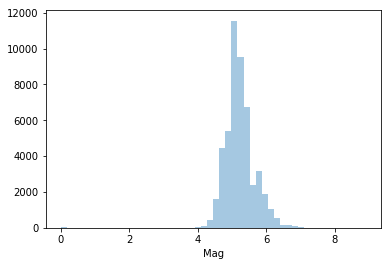

In [5]:
sns.distplot(quakes['Mag'],kde=False)

Now that we have the dataframe, the next step is to plot the events and then see if we can do some sort of cluster analysis to understand their distribution 

In [6]:
from mpl_toolkits.basemap import Basemap
from obspy.imaging.beachball import beach

In [7]:
def select_color(dep):
    
    '''Function used to color the focal mechanisms by depth'''
    
    if dep <= 10:
        return 'red'
    elif 10 < dep <= 30:
        return 'blue'
    elif 30 < dep <= 50:
        return 'green'
    elif 50 < dep <= 100:
        return 'yellow'
    elif 100 < dep <= 150:
        return 'orange'
    elif 150 < dep <= 250:
        return 'cyan'
    else:
        return 'black'

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Selected earthquakes')

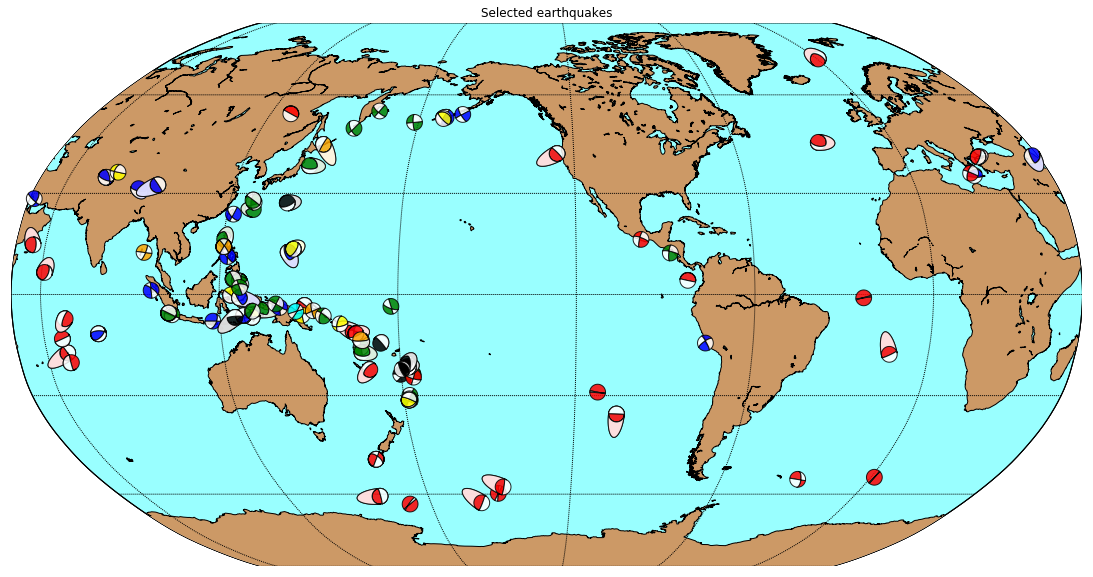

In [18]:
#Set up the map
plt.figure(figsize=(20,10))
m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90., 120., 30.))
m.drawmeridians(np.arange(0., 420., 60.))
m.drawmapboundary()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')

ax = plt.gca()
focal_planes = quakes[['Lat','Lon','Dep','Strike_1','Dip_1','Rake_1']].sample(100)

for index, row in focal_planes.iterrows():
    n1 = [row['Strike_1'],row['Dip_1'],row['Rake_1']]
    ll = (row['Lon'],row['Lat'])
    x,y = m(ll[0],ll[1])
    col = select_color(row['Dep'])
    
    b = beach(n1, xy=(x,y), width=500000, linewidth=1, alpha=0.85, facecolor=col)
    b.set_zorder(10)
    ax.add_collection(b)

plt.title("Selected earthquakes")
    

In [14]:
quakes[['Strike_1','Dip_1','Rake_1']].loc[:10]

,Strike_1,Dip_1,Rake_1
0,202,93,30
1,350,-60,28
2,206,78,18
3,246,-86,22
4,127,173,82
5,200,95,26
6,189,71,11
7,197,97,17
8,196,91,26
9,180,73,10
